# Enviroment Setup

In [ ]:
#Checking python version
!python --version

Python 3.10.12


In [ ]:
#Makes sure that colab is running of GPU allowing the model to train faster
!nvidia-smi

Thu Feb  8 17:34:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#checking path
import os
home_path = os.getcwd()
print(home_path)

/content


In [ ]:

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the directory where your dataset is stored
%cd /content/drive/MyDrive/FinalYearProject/

# Check the contents of the current directory
!ls


Mounted at /content/drive
/content/drive/MyDrive/FinalYearProject
CrackDetectionDataset.zip  Dataset  Final-Year-Project-2  runs	yolov8m.pt


In [ ]:
!unzip CrackDetectionDataset.zip -d /content/drive/MyDrive/FinalYearProject/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15001_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15002_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15003_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15004_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15005_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15006_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15007_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15008_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15009_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15010_1.jpg  
  inflating: /content/drive/MyDrive/FinalYearProject/Dataset/Positive/15011_1.jpg  
  inflating: /content/dri

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Labelling Dataset

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/FinalYearProject/Dataset'
output_path = '/content/drive/MyDrive/FinalYearProject/Dataset'  # output for YOLO labels


classes = [subdir for subdir in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, subdir))]


os.makedirs(output_path, exist_ok=True)

label_paths = []


# Iterate through each class label
for class_label in classes:
    class_path = os.path.join(dataset_path, class_label)
    output_class_path = os.path.join(output_path, class_label)

    # Create the output for the class if it doesn't exist
    os.makedirs(output_class_path, exist_ok=True)

    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Generate the YOLO label file path
        label_filename = image_name.replace(".jpg", ".txt")
        label_path = os.path.join(output_class_path, label_filename)

        #  YOLO label file
        with open(label_path, 'w') as label_file:
            # YOLO format: class_label x_center y_center width height
            label_file.write(f"{classes.index(class_label)} 0.5 0.5 1.0 1.0\n")

        output_image_path = os.path.join(output_class_path, image_name)
        os.system(f"cp {image_path} {output_image_path}")





In [ ]:
!zip -r dataset.zip /content/drive/MyDrive/FinalYearProject/Dataset

Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15001.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15002.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15003.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15004.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15005.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15006.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15007.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15008.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15009.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYearProject/Dataset/Negative/15010.txt (deflated 22%)
  adding: content/drive/MyDrive/FinalYe

## Zipping Labelled Dataset

In [ ]:
!mv dataset.zip /content/drive/MyDrive/FinalYearProject

mv: 'dataset.zip' and '/content/drive/MyDrive/FinalYearProject/dataset.zip' are the same file


## Downloading Labelled dataset

In [ ]:
from google.colab import files

# Download the zip file
files.download('/content/drive/MyDrive/FinalYearProject/dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install keras.utils
import keras.utils

from keras.preprocessing.image import ImageDataGenerator

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=9b094848a636e32cee6fa6d62e1f1316e6681ec174a8ca1e605517215548d1d6
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
!pip install opencv-python tqdm

# Roboflow Pre-Processing

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jkUc6wZxeycrR3RPcPsw")
project = rf.workspace("computer-vision-zr0gb").project("final-year-project-npyfe")
dataset = project.version(2).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Final-Year-Project-2 in yolov8:: 100%|██████████| 454056/454056 [01:28<00:00, 5146.25it/s]


# YOLOv8

## Installing Requirements

In [ ]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 12.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
#running yolo benchmark evalutates the speed and accuracy of the model and is good for comparision against other models
# !yolo mode=benchmark

## YOLOv8 model training (1 epoch)

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=1 imgsz=640

New https://pypi.org/project/ultralytics/8.1.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Final-Year-Project-2/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment

## YOLOv8 Training Evaluation



*   The first limitation is that it took 2.195 hours to complete training which is considered a long time for training on 1 epoch. If more epoch where to be done it could take hours.
*   With the normal version of google colab the runtime will shutdown after a certain amount of hours meaning a limited amount of epoch could be done.



## F1 Confidence Curve

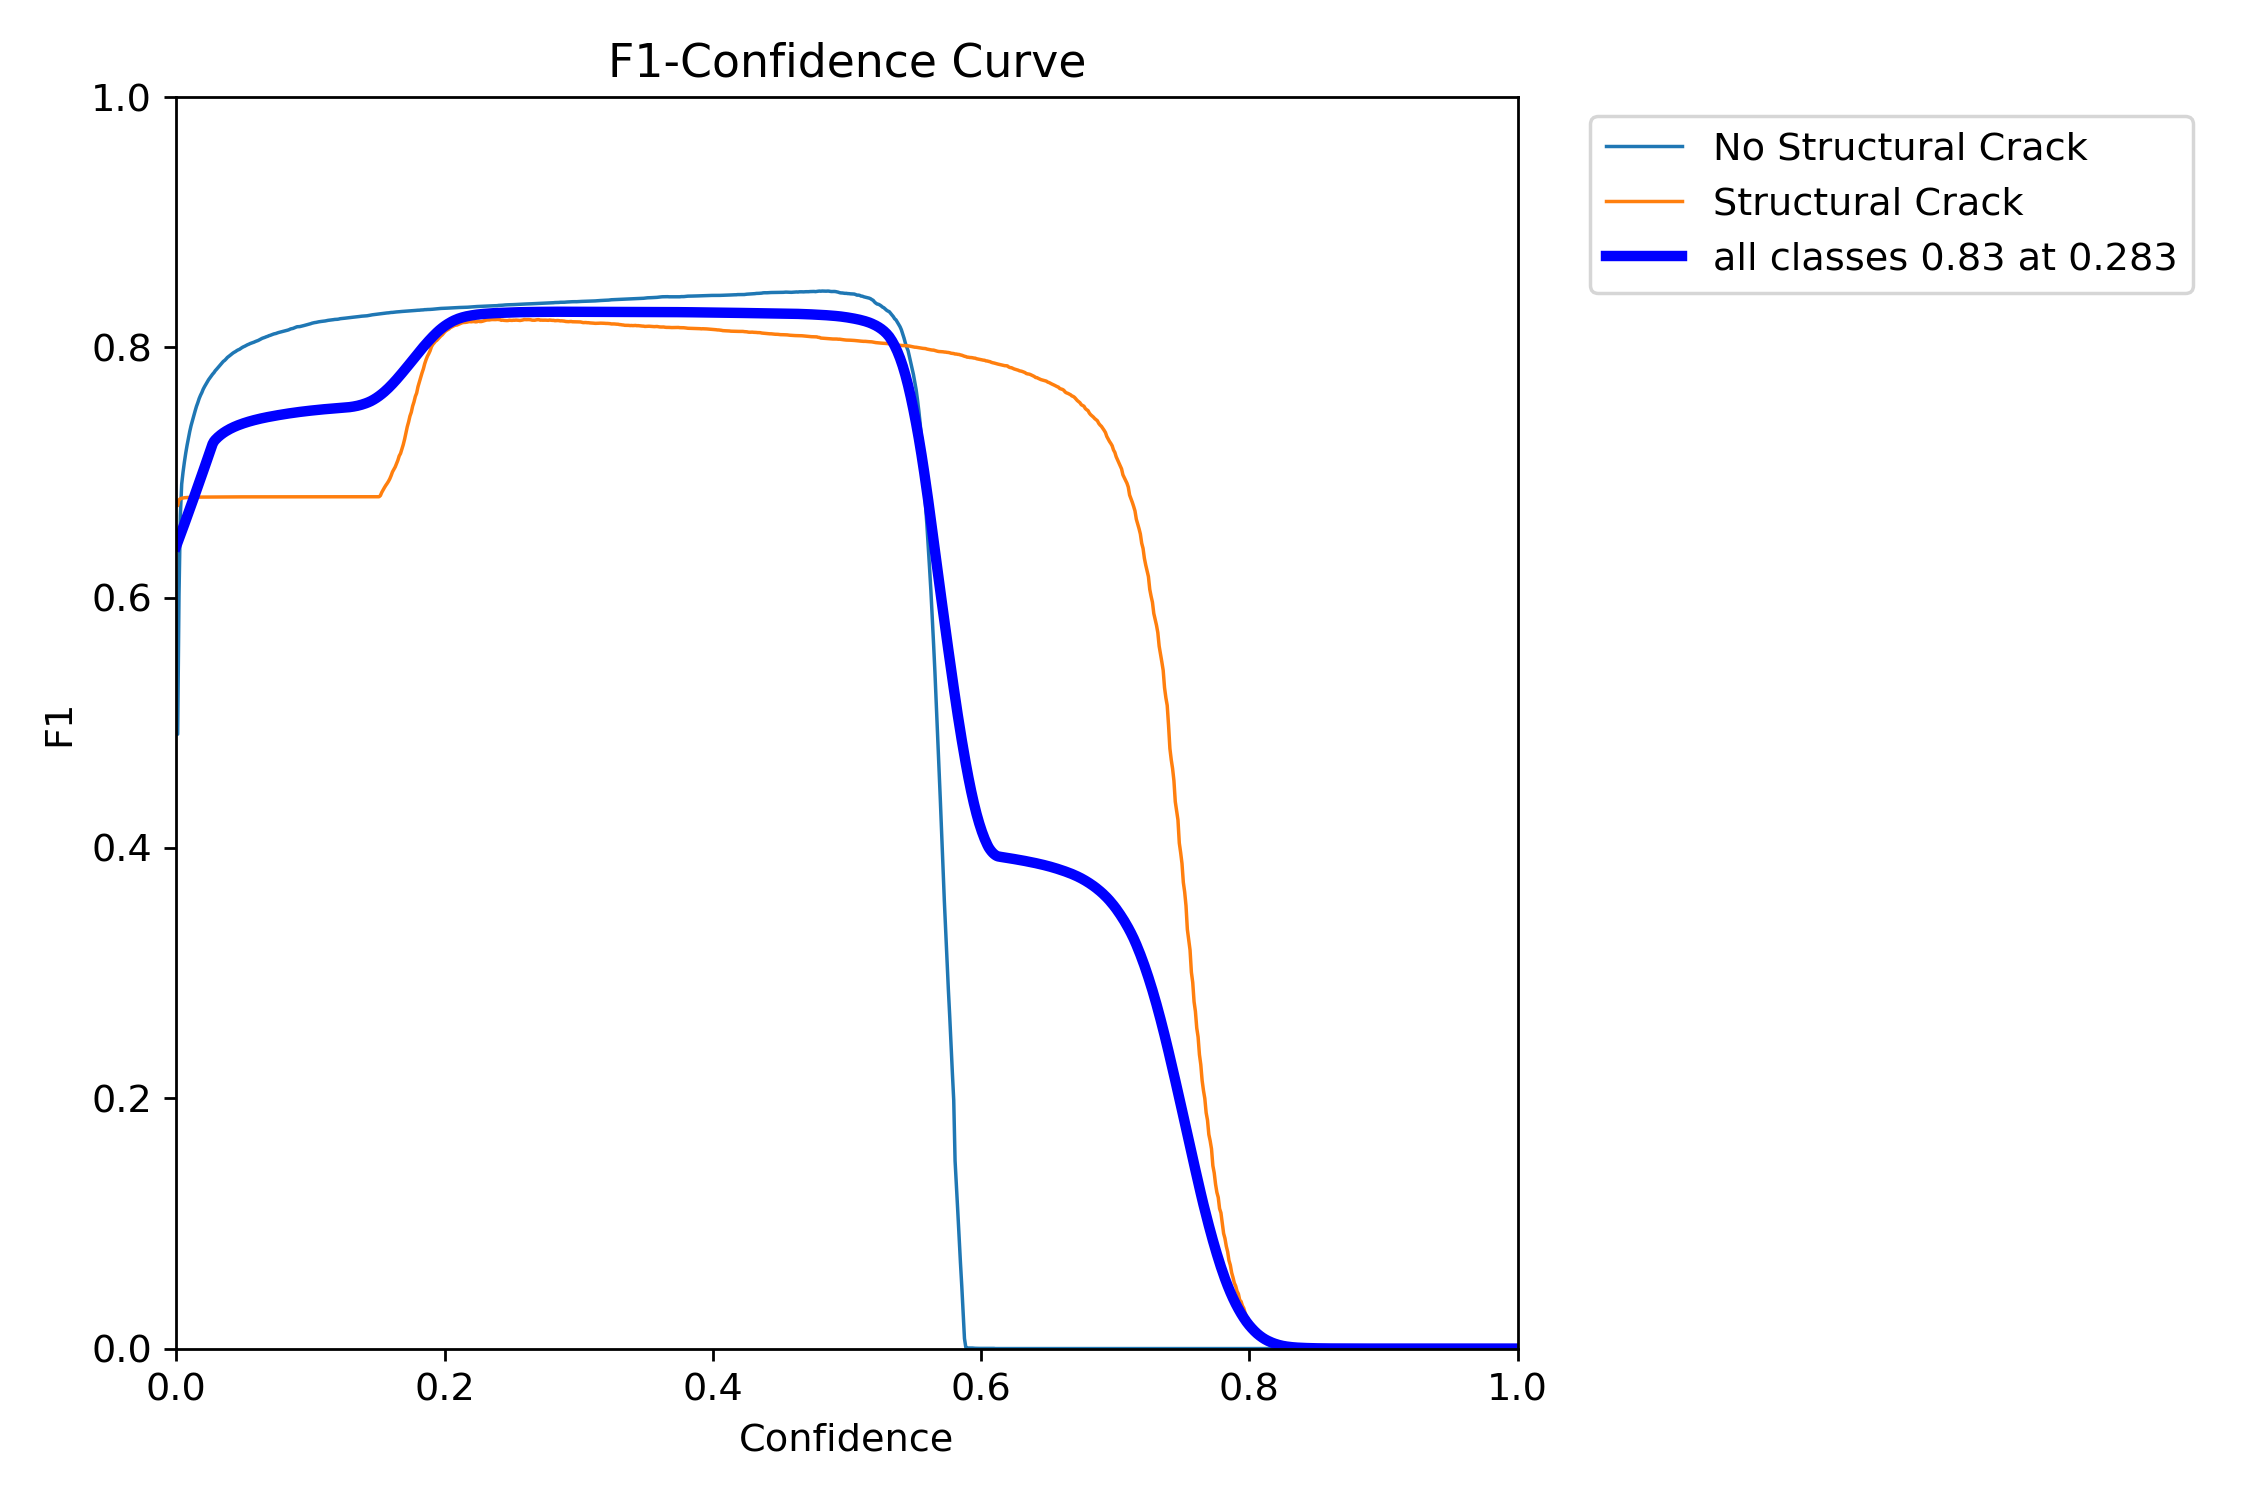

In [ ]:
Image(filename=f'/content/drive/MyDrive/FinalYearProject/runs/detect/train3/F1_curve.png', width=600)

## YOLOv8 Detection/Prediction

In [ ]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/FinalYearProject/runs/detect/train3/weights/best.pt' conf=0.40 source='/content/drive/MyDrive/FinalYearProject/runs/detect/predict'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/drive/MyDrive/FinalYearProject/runs/detect/predict/crack.jpg: 480x640 1 No Structural Crack, 1 Structural Crack, 69.5ms
image 2/2 /content/drive/MyDrive/FinalYearProject/runs/detect/predict/crack2.jpg: 384x640 1 Structural Crack, 112.4ms
Speed: 8.6ms preprocess, 91.0ms inference, 465.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


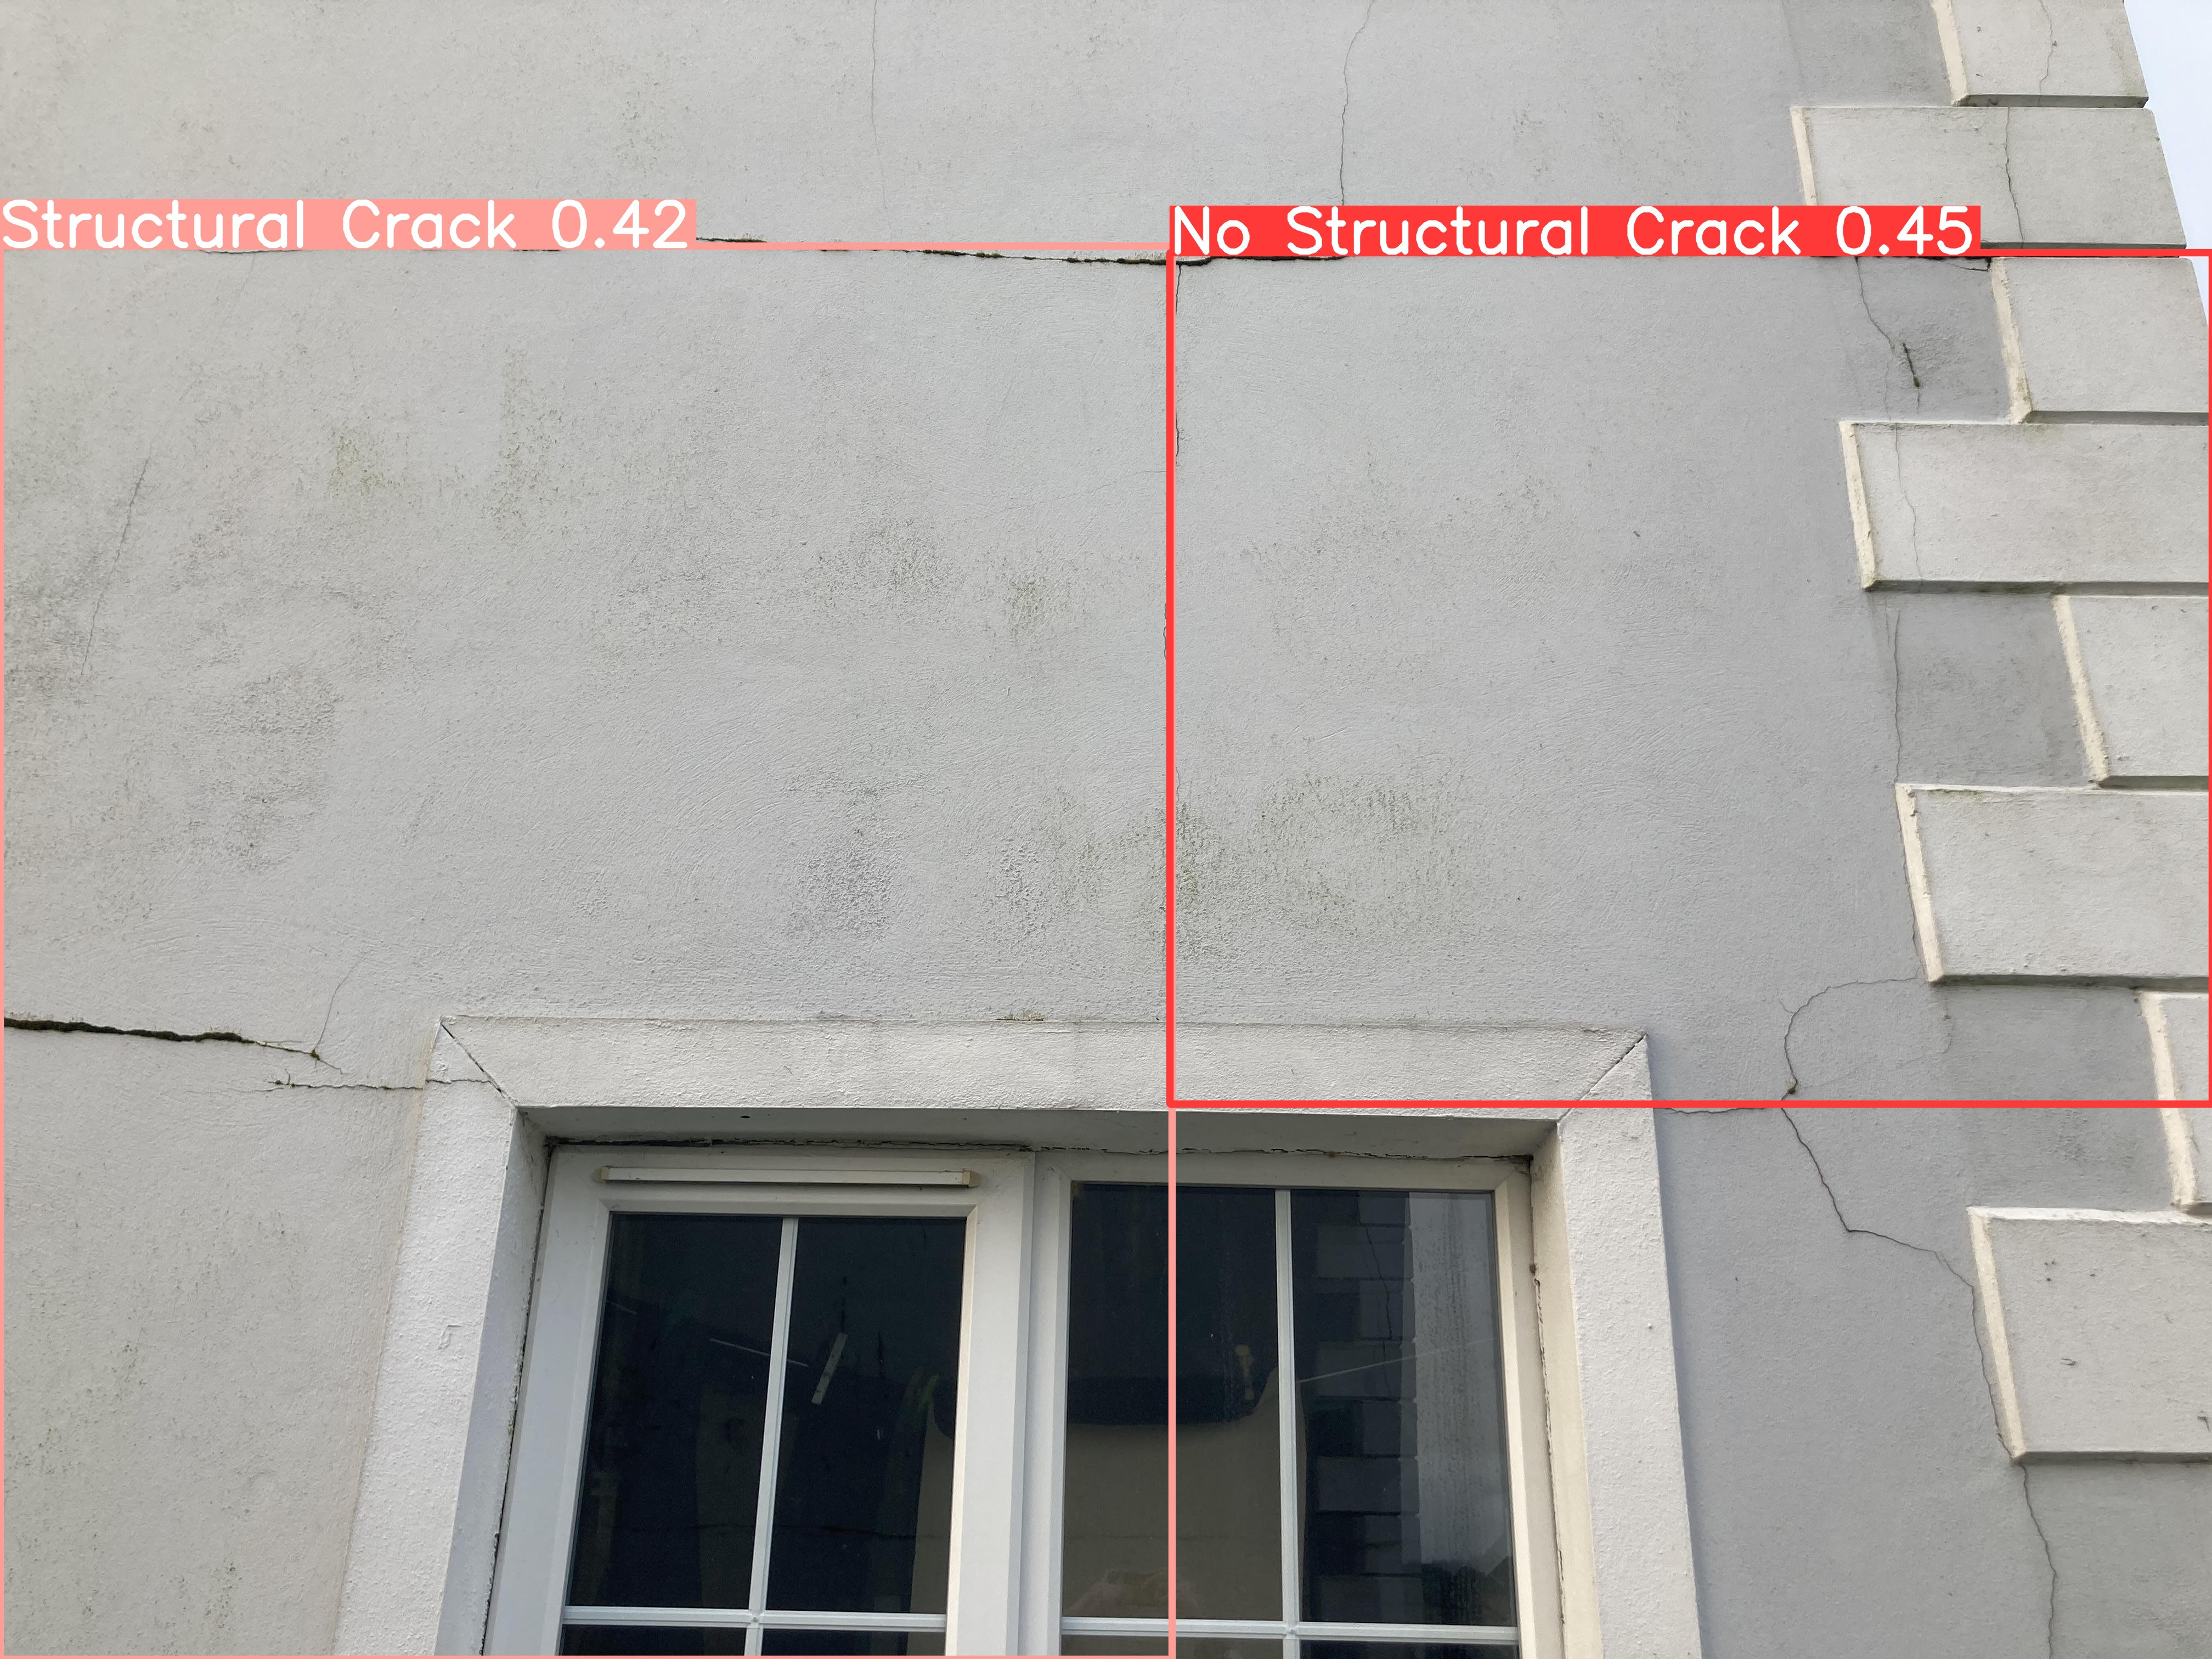

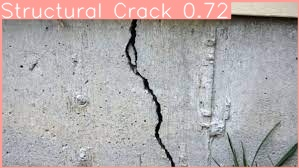

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/FinalYearProject/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")